# <span style="color:red">Import library</span>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


#  <span style="color:red">Load Data</span>

In [ ]:
data = pd.read_csv('credit_card_churn.csv')
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

# <span style="color:red">Exploratory Data Analysis : EDA</span>


## <span style="color:green">Describtive Statistics</span>


In [ ]:
# For numerical features
data.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
count         10127.000000           10127.000000   
mean              0.712222               0.274894   
std               0.238086               0.275691   
min               0.000000               0.000000   
25%               0.582000               0.023000   
50%               0.702000               0.176000   
75%               0.818000               0.503000   
max               3.714000               0.999000   

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
count                                       10127.000000                                                                                    
mean                                            0.159997                                                                                    
std                                             0.365301                                                                                    
min                                             0.000008                                                                                    
25%                                             0.000099                                                                                    
50%                                             0.000181                                                                                    
75%                                             

In [ ]:
# For categorical features
data.describe(include = 'O')

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

In [ ]:
# Number of distinct values
for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"\n")
    print(f"{column} : {num_distinct_values} distinct values")



CLIENTNUM : 10127 distinct values


Attrition_Flag : 2 distinct values


Customer_Age : 45 distinct values


Gender : 2 distinct values


Dependent_count : 6 distinct values


Education_Level : 7 distinct values


Marital_Status : 4 distinct values


Income_Category : 6 distinct values


Card_Category : 4 distinct values


Months_on_book : 44 distinct values


Total_Relationship_Count : 6 distinct values


Months_Inactive_12_mon : 7 distinct values


Contacts_Count_12_mon : 7 distinct values


Credit_Limit : 6205 distinct values


Total_Revolving_Bal : 1974 distinct values


Avg_Open_To_Buy : 6813 distinct values


Total_Amt_Chng_Q4_Q1 : 1158 distinct values


Total_Trans_Amt : 5033 distinct values


Total_Trans_Ct : 126 distinct values


Total_Ct_Chng_Q4_Q1 : 830 distinct values


Avg_Utilization_Ratio : 964 distinct values


Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 : 1704 distinct values


Nai

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

## <span style="color:green">Drop unicessary columns</span>


In [ ]:
# We are going to drop the two naive_bayes features and the CLIENTNUM
data = data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','CLIENTNUM'], axis = 1)

In [ ]:
data

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0

<span style="color:purple">Before doing any type of analysis , we are going to check the missing values! </span>


In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total  Percent
Attrition_Flag                0      0.0
Customer_Age                  0      0.0
Total_Ct_Chng_Q4_Q1           0      0.0
Total_Trans_Ct                0      0.0
Total_Trans_Amt               0      0.0
Total_Amt_Chng_Q4_Q1          0      0.0
Avg_Open_To_Buy               0      0.0
Total_Revolving_Bal           0      0.0
Credit_Limit                  0      0.0
Contacts_Count_12_mon         0      0.0
Months_Inactive_12_mon        0      0.0
Total_Relationship_Count      0      0.0
Months_on_book                0      0.0
Card_Category                 0      0.0
Income_Category               0      0.0
Marital_Status                0      0.0
Education_Level               0      0.0
Dependent_count               0      0.0
Gender                        0      0.0
Avg_Utilization_Ratio         0      0.0

<span style="color:purple">As we can see , there is no missing values but if we do </span>


In [ ]:
data['Marital_Status'].value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

<span style="color:purple">We see 'unknown' ==> these are missing values  </span>


<span style="color:purple">The problem is with the categorical features so we are going to check the features with missing values then we are going to deal with them </span>


<span style="color:purple"> For the marital_Status: The percentage of unknown values is huge so we can't drop them.Therefore we are going to use the most frequent method to replace these unknown values</span>


In [ ]:
most_frequent_category = data['Marital_Status'].value_counts().index[0]
data['Marital_Status'] = data['Marital_Status'].replace('Unknown', most_frequent_category)

In [ ]:
data['Marital_Status'].value_counts()

Marital_Status
Married     5436
Single      3943
Divorced     748
Name: count, dtype: int64

In [ ]:
data['Gender'].value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

<span style="color:purple">The feature gender doesnt have missing values

In [ ]:
data['Education_Level'].value_counts()

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [ ]:
most_frequent_category = data['Education_Level'].value_counts().index[0]
data['Education_Level'] = data['Education_Level'].replace('Unknown', most_frequent_category)

In [ ]:
data['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [ ]:
most_frequent_category = data['Income_Category'].value_counts().index[0]
data['Income_Category'] = data['Income_Category'].replace('Unknown', most_frequent_category)

In [ ]:
data['Card_Category'].value_counts()

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

<span style="color:purple">The feature Card Category doesnt have missing values </span>

## <span style="color:green">Numerical/Categorical columns </span>

In [ ]:
cat_columns = []
num_columns = []
for col in data.columns:
    if data[col].dtype == "O":
        cat_columns.append(col)
    else:
        num_columns.append(col)
print(cat_columns)
print(num_columns)

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


## <span style="color:green">Continious/Discrete Columns </span>

In [ ]:
threshold=20 # This means that if a column has 20 or fewer unique values, it is considered discrete.
continuous_cols = [col for col in num_columns  if data[col].nunique() > threshold]
discrete_cols = [col for col in num_columns if data[col].nunique() <= threshold]
print(continuous_cols)


['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


## <span style="color:green" >Univariate Analysis </span>

### <span style="color:orange"> Proportion of Target Class </span>

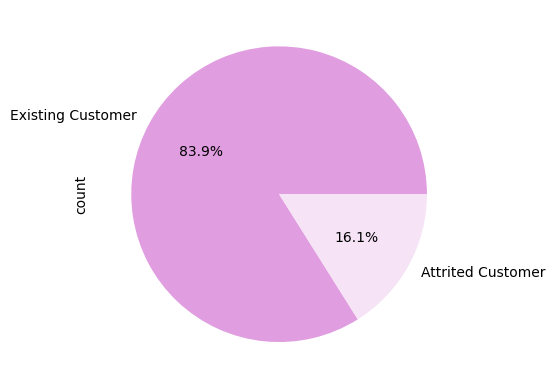

In [ ]:
custom_colors =['#E09DE0', '#F6E3F6']
data['Attrition_Flag'].value_counts().plot.pie(autopct='%1.1f%%',colors=custom_colors)
plt.show()

### <span style="color:orange"> Discrete Columns </span>

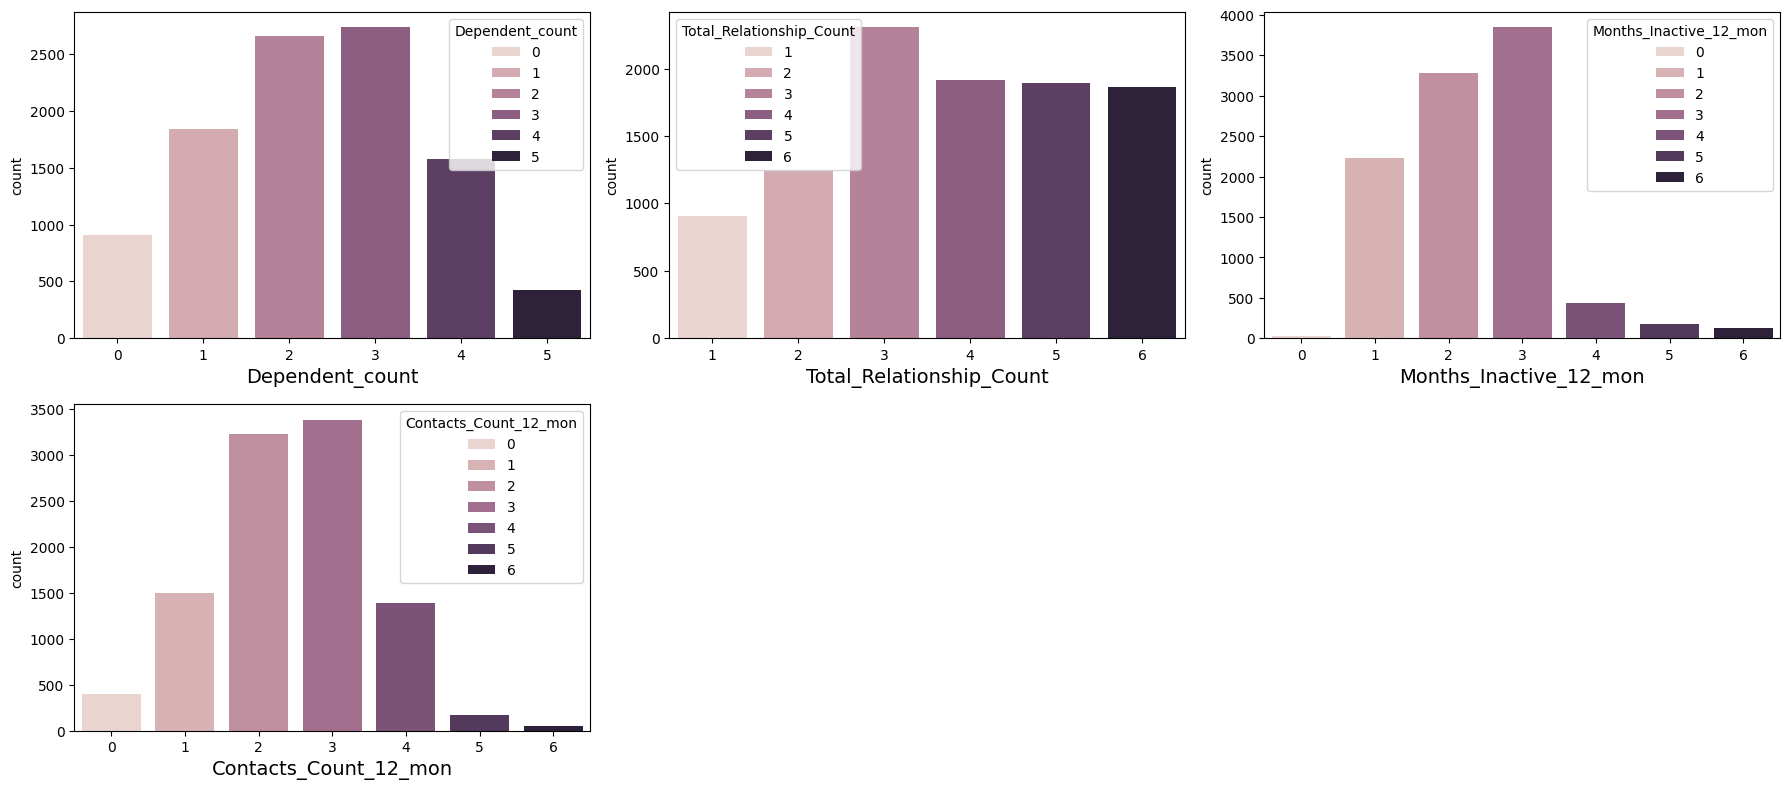

In [ ]:
# For categorical features, we are going to use visualizations like countplots to understand the distribution of each category
# and explore potential relationships with the target variable.
plt.figure(figsize=(18, 8))
i = 1
for column in discrete_cols:
    plt.subplot(2, 3, i)
    sns.countplot(x=data[column], hue=data[column])
    plt.xlabel(column, fontsize=14)
    i += 1
plt.tight_layout()
plt.show()

### <span style="color:orange">Continious Columns </span>

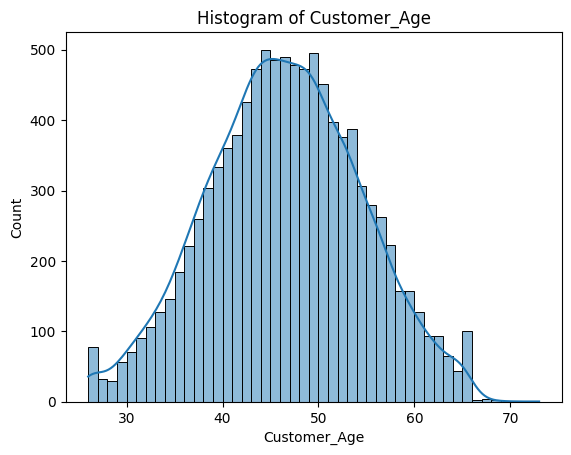

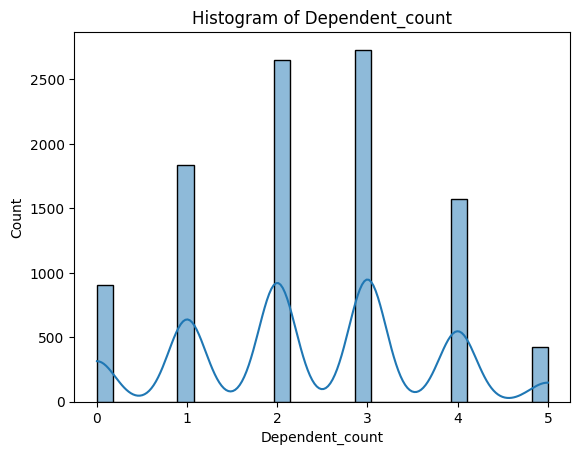

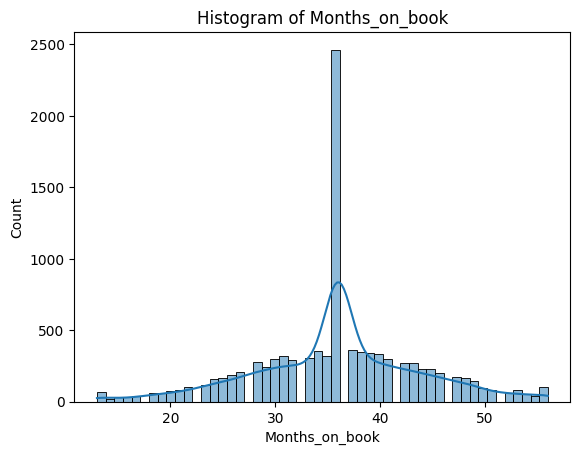

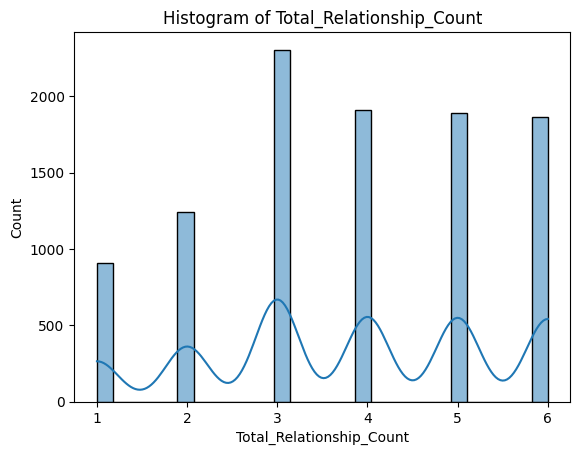

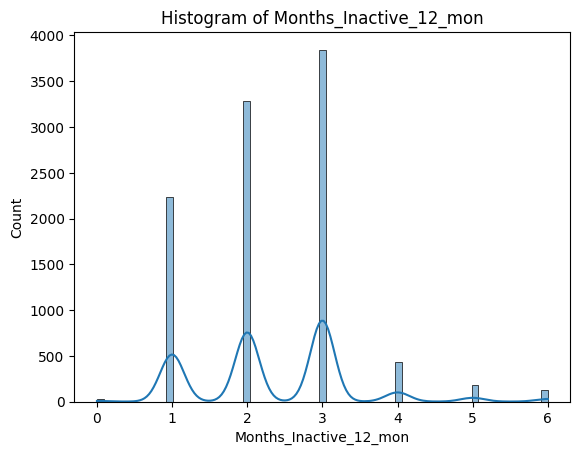

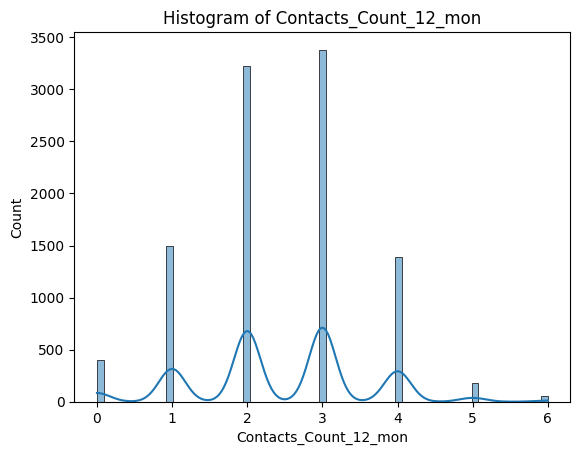

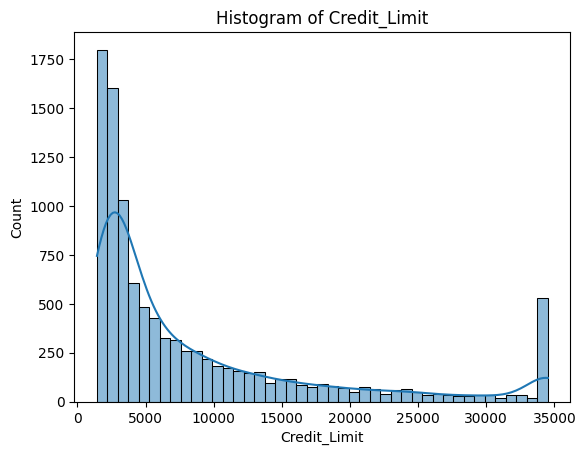

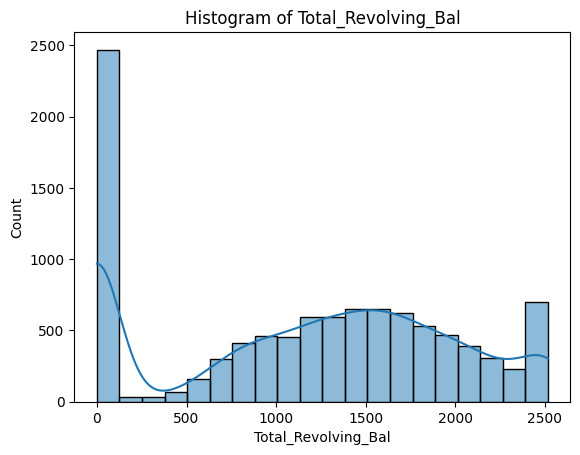

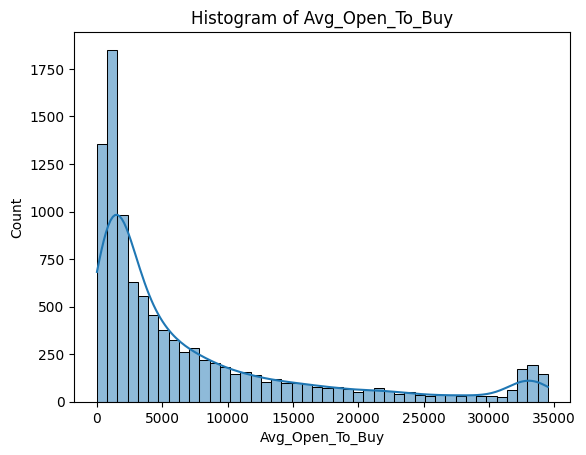

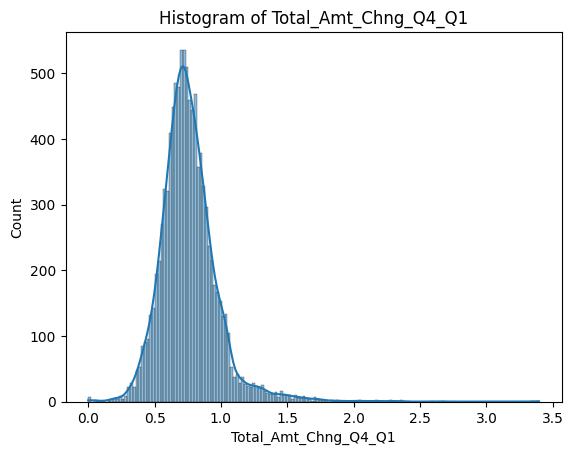

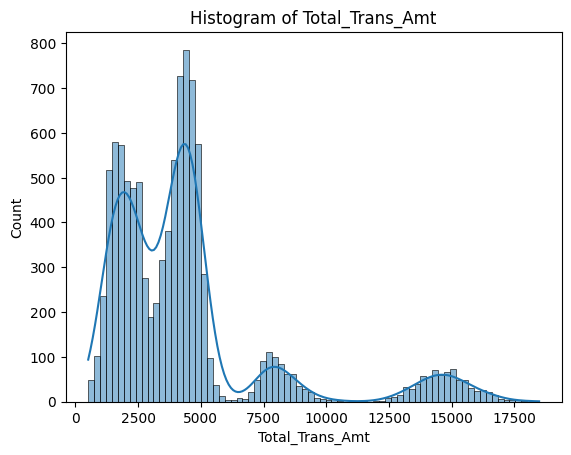

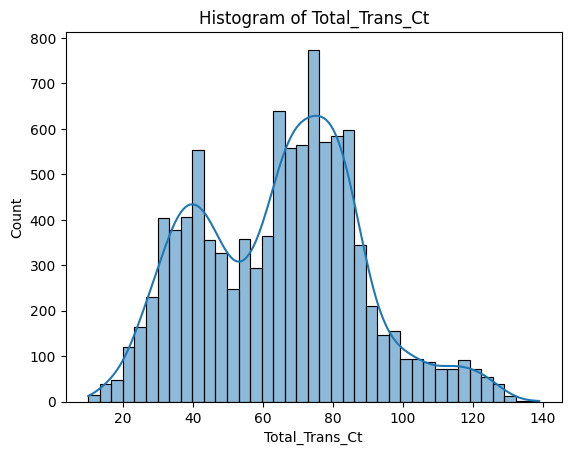

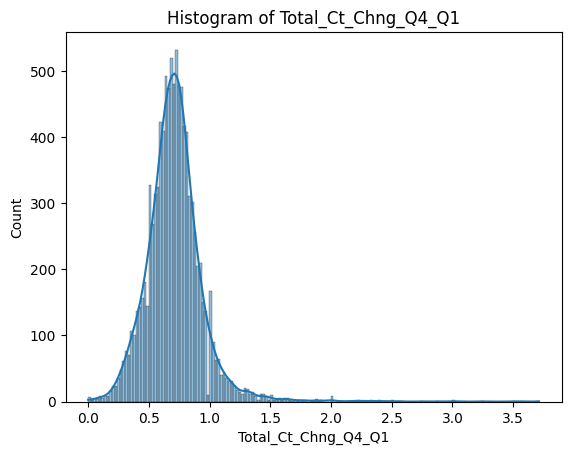

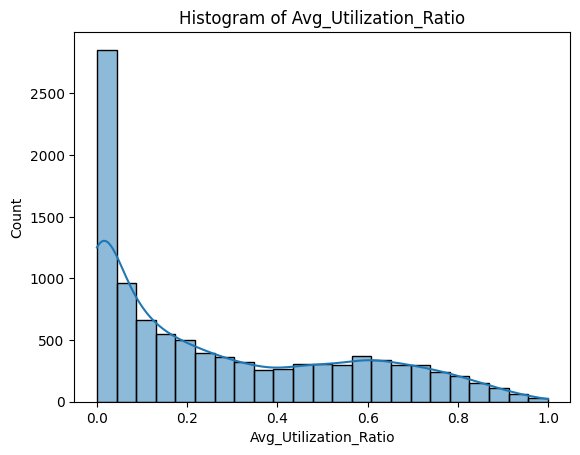

In [ ]:
for column in num_columns:
    plt.figure()
    sns.histplot(data=data, x=column, kde=True)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.show()

<span style="color:purple">To assess the distribution and potential skewness of each feature, we'll conduct skewness tests. Here's a distribution plot of 'Customer Age' as an example. </span>

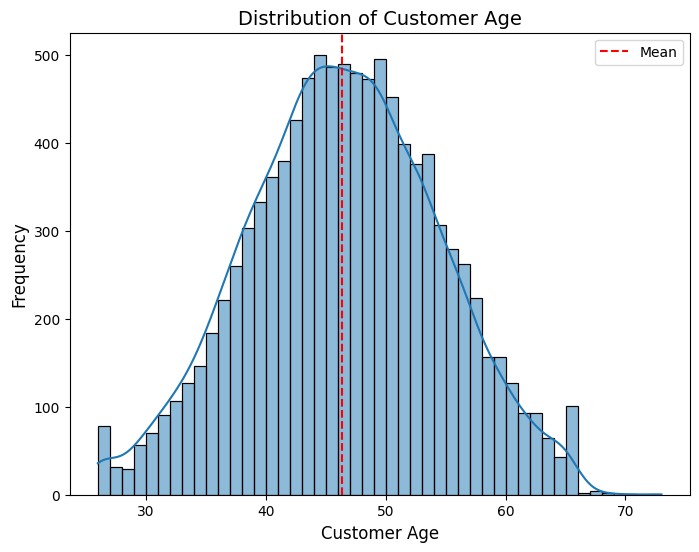

In [ ]:
plt.figure(figsize=(8, 6))
# Histogram with density plot
sns.histplot(data=data, x='Customer_Age', kde=True)
plt.title('Distribution of Customer Age', fontsize=14)
plt.xlabel('Customer Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add vertical line for the mean
plt.axvline(data['Customer_Age'].mean(), color='red', linestyle='--', label='Mean')

plt.legend()
plt.show()

<span style="color:purple"> ==> The distribution Of Customer Age is left-skewed </span>

In [ ]:
def skewness(feature):
    skew = data[feature].skew()
    print("Skewness of the ", feature, " = ", skew)
    if skew > 0:
        print("The distribution is right-skewed.")
    elif skew < 0:
        print("The distribution is left-skewed.")
    else:
        print("The distribution is approximately symmetric.")
    return

In [ ]:
## Skewness of features
for feature in continuous_cols:
    if feature != "target":
        skewness(feature)
        print()

Skewness of the  Customer_Age  =  -0.033605016317173456
The distribution is left-skewed.

Skewness of the  Months_on_book  =  -0.10656535989402989
The distribution is left-skewed.

Skewness of the  Credit_Limit  =  1.666725807993647
The distribution is right-skewed.

Skewness of the  Total_Revolving_Bal  =  -0.14883725028007228
The distribution is left-skewed.

Skewness of the  Avg_Open_To_Buy  =  1.6616965459311595
The distribution is right-skewed.

Skewness of the  Total_Amt_Chng_Q4_Q1  =  1.7320634114286038
The distribution is right-skewed.

Skewness of the  Total_Trans_Amt  =  2.0410034025756936
The distribution is right-skewed.

Skewness of the  Total_Trans_Ct  =  0.15367306849872275
The distribution is right-skewed.

Skewness of the  Total_Ct_Chng_Q4_Q1  =  2.0640305679077477
The distribution is right-skewed.

Skewness of the  Avg_Utilization_Ratio  =  0.7180079967731994
The distribution is right-skewed.



<span style="color:purple">While skewness describes the asymmetry of a distribution, kurtosis measures the 'tailedness,' indicating the presence of extreme values. Let's analyze the kurtosis of our features.</span>

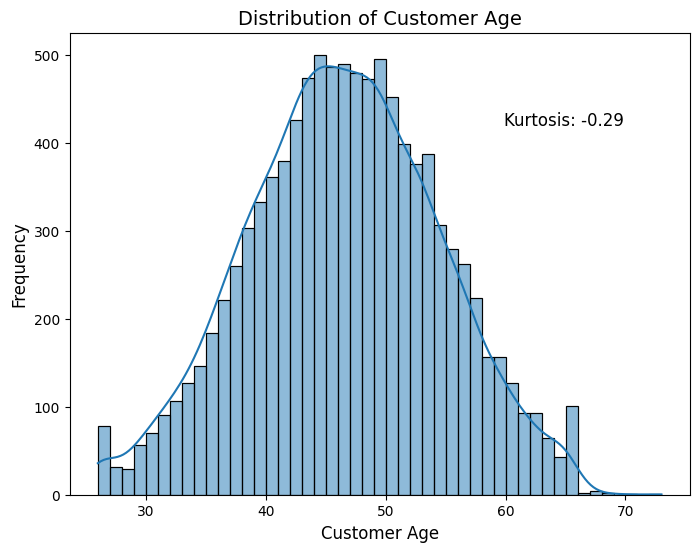

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Customer_Age', kde=True)
plt.title('Distribution of Customer Age', fontsize=14)
plt.xlabel('Customer Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
feature_kurtosis = kurtosis(data['Customer_Age'])
plt.annotate(f"Kurtosis: {feature_kurtosis:.2f}", xy=(0.7, 0.8), xycoords='axes fraction', fontsize=12)
plt.show()

<span style="color:purple"> ==>  The distribution of Customer Age is leptokurtic. </span>


In [ ]:
def kurtosis(feature):
    kurt = data[feature].kurt()
    print("Kurtosis of the ", feature, " = ", kurt)
    if kurt > 3:
        print("The distribution is platykurtic.")
    elif kurt < 3:
        print("The distribution is leptokurtic.")
    else:
        print("The distribution is mesokurtic..")
    return

In [ ]:
## Kurtosis of features
for feature in continuous_cols:
    if feature != "target":
        kurtosis(feature)
        print()

Kurtosis of the  Customer_Age  =  -0.2886199152745088
The distribution is leptokurtic.

Kurtosis of the  Months_on_book  =  0.40010012019986707
The distribution is leptokurtic.

Kurtosis of the  Credit_Limit  =  1.8089893357093434
The distribution is leptokurtic.

Kurtosis of the  Total_Revolving_Bal  =  -1.145991781532597
The distribution is leptokurtic.

Kurtosis of the  Avg_Open_To_Buy  =  1.7986172957122664
The distribution is leptokurtic.

Kurtosis of the  Total_Amt_Chng_Q4_Q1  =  9.993501178599228
The distribution is platykurtic.

Kurtosis of the  Total_Trans_Amt  =  3.8940234056985163
The distribution is platykurtic.

Kurtosis of the  Total_Trans_Ct  =  -0.36716324112759624
The distribution is leptokurtic.

Kurtosis of the  Total_Ct_Chng_Q4_Q1  =  15.689292901407043
The distribution is platykurtic.

Kurtosis of the  Avg_Utilization_Ratio  =  -0.7949719514980287
The distribution is leptokurtic.



### <span style="color:orange">Categorical columns</span>

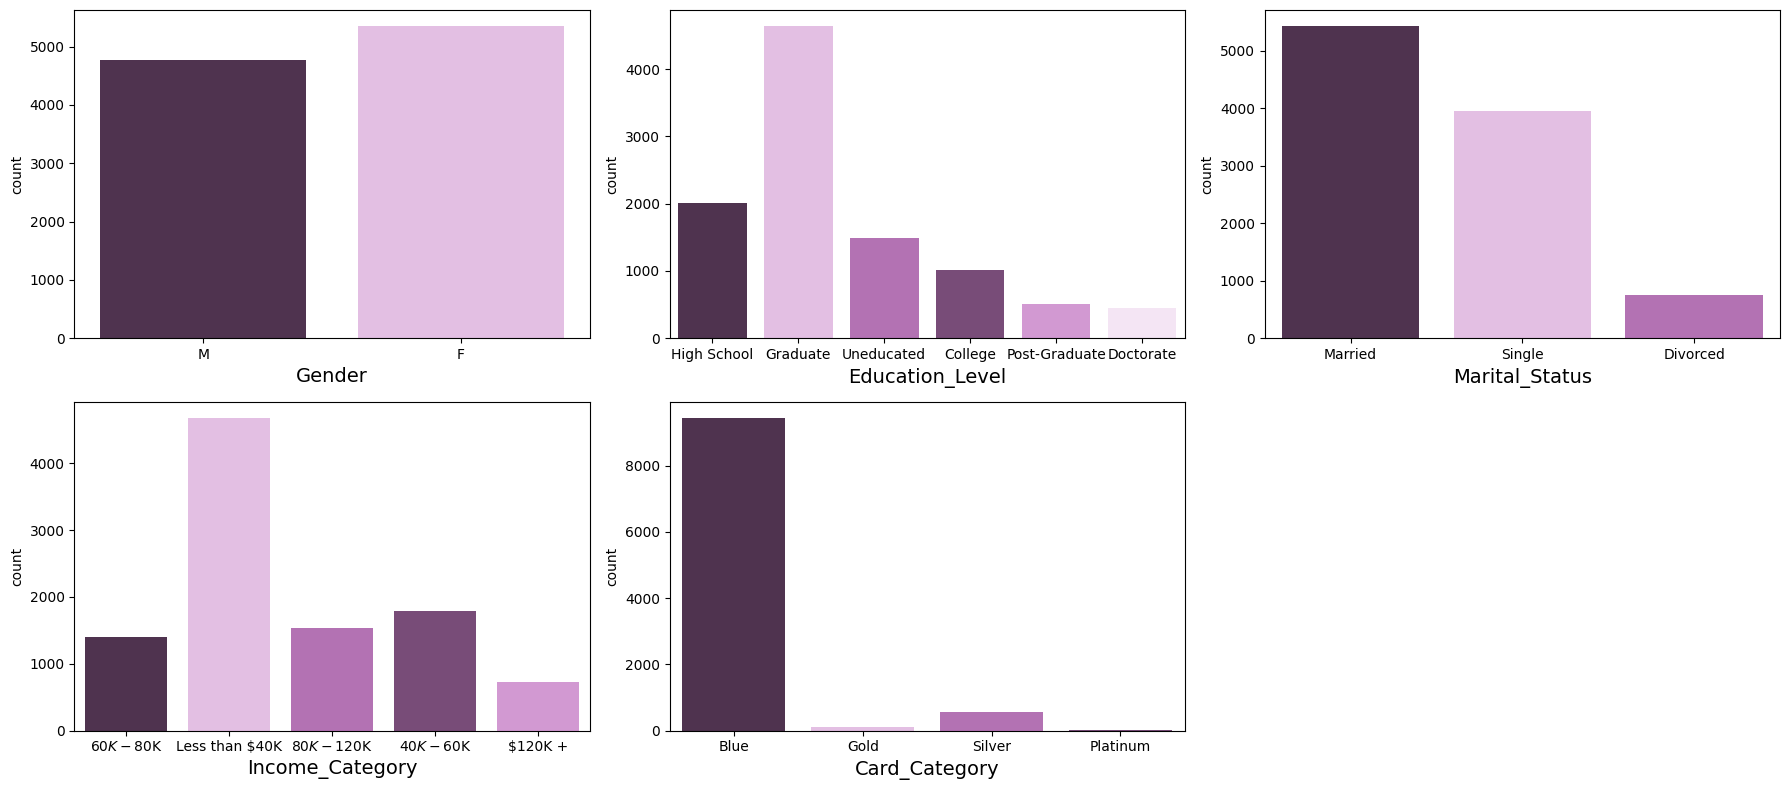

In [ ]:
#For categorical features, we are going to use countplots to visualize the distribution of each category and explore
#their frequencies.
custom_palette={'#7F457F','#BE67BE','#DC8FDC','#E9B9E9','#F6E3F6','#542E54'}
plt.figure(figsize=(18,8))
i = 1 # counter

for column in cat_columns:
  if column!='Attrition_Flag':

    plt.subplot(2,3,i)
    sns.countplot(x=data[column],hue=data[column],palette=custom_palette)
    plt.xlabel(column,fontsize=14)
    i+=1

plt.tight_layout()
plt.show()

## <span style="color:green">Bivariate Analysis </span>

<span style="color:purple"> We are going to see the correlation of numerical feature with the target</span>

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_35292\318466026.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data['Attrition_Flag']=new_data['Attrition_Flag'].replace({"Attrited Customer":0,"Existing Customer":1})


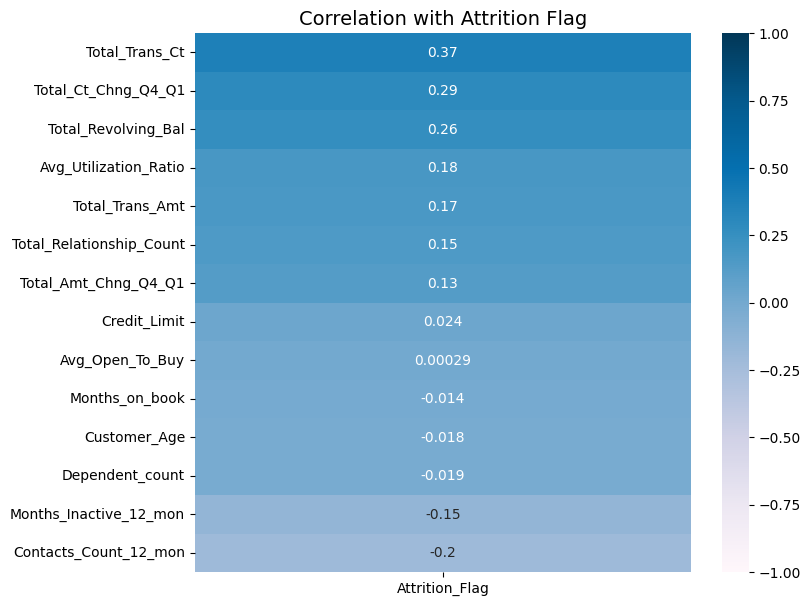

In [ ]:
new_data = data.copy()
new_data['Attrition_Flag']=new_data['Attrition_Flag'].replace({"Attrited Customer":0,"Existing Customer":1})
correlation_matrix = new_data[num_columns + ['Attrition_Flag']].corr()
target_correlations = correlation_matrix['Attrition_Flag'].drop('Attrition_Flag').sort_values(ascending=False)
plt.figure(figsize=(8, len(num_columns) * 0.5))  # Adjust figure height based on number of features
sns.heatmap(target_correlations.to_frame(), annot=True, cmap='PuBu', vmin=-1, vmax=1)
plt.title('Correlation with Attrition Flag', fontsize=14)
plt.show()

### <span style="color:orange"> Hypothesis Tests </span>

<span style="color:purple"> We'll conduct hypothesis tests for relevant features, comparing each p-value against a significance level of 5%. If the p-value exceeds this threshold, we'll fail to reject the null hypothesis (H0). Following the statistical tests, we'll visualize the data to gain further insights and confirm the observed patterns.</span>

#### Hypothesis 1: For the age (Anova test)
H0: There is no difference in churn rate between age groups.

H1: There is a difference in churn rate between age groups.

In [ ]:
model = ols('Attrition_Flag ~ C(Customer_Age)', data=new_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA
print(anova_table)

                      sum_sq       df         F    PR(>F)
C(Customer_Age)     8.782924     44.0  1.483234  0.020602
Residual         1356.823869  10082.0       NaN       NaN


=> <span style="color:purple"> Hypotheses Tests Since the p-value (0.026) is less than the significance level of 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in churn rate between age groups.</span>

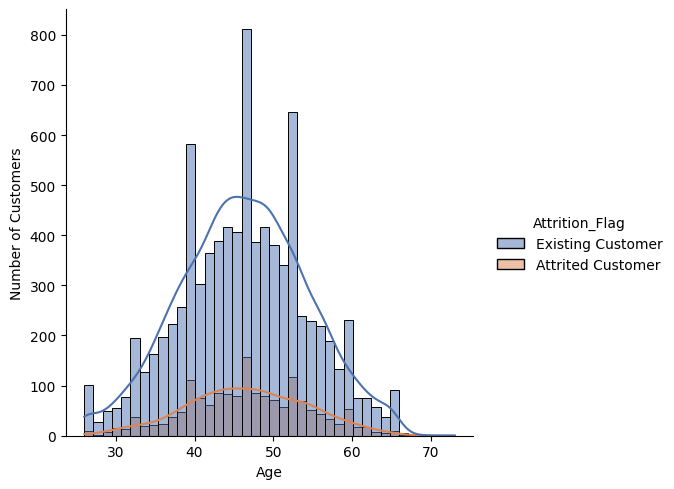

In [ ]:
palette = "deep"
sns.set_palette(palette)
sns.displot(data=data, x='Customer_Age',hue='Attrition_Flag', kde=True, bins=40)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

<span style="color:purple"> As we can see there is a difference in churn rate between age groups.</span>

#### Hypothesis 2 For the Gender (Chi-Square)

H0: There is no difference in churn rate between males and females.

H1: There is a difference in churn rate between males and females.

In [ ]:
crosstab = pd.crosstab(data['Attrition_Flag'], data['Gender'])
chi2, p_value, dof, expected = chi2_contingency(crosstab)
print(f"Chi-Square: {chi2}, p-value: {p_value}")

Chi-Square: 13.865613700637342, p-value: 0.00019635846717310269


<span style="color:purple"> ==> With a p-value of 0.000196, which is significantly less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in churn rate between males and females.</span>

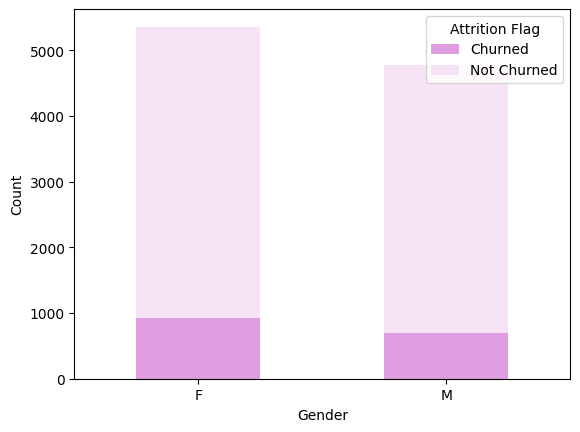

In [ ]:
custom_colors = ['#E09DE0', '#F6E3F6']
gender_churn_counts = data.groupby(['Gender', 'Attrition_Flag']).size().unstack()
gender_churn_counts.plot(kind='bar', stacked=True,color=custom_colors)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Optional: rotate x-axis labels for better readability
plt.legend(title='Attrition Flag', labels=['Churned', 'Not Churned'])
plt.show()

<span style="color:purple"> As we can see there is a difference in churn rate between males and females.</span>

#### Hypothesis 3 For the Education Level (Chi-Square)


H0: There is no association between education level and churn rate.

H1: There is an association between education level and churn rate.

In [ ]:
crosstab = pd.crosstab(data['Attrition_Flag'], data['Education_Level'])
chi2, p_value, dof, expected = chi2_contingency(crosstab)
print(f"Chi-Square: {chi2}, p-value: {p_value}")

Chi-Square: 11.260856604376308, p-value: 0.046446360120696556


<span style="color:purple"> ==> The p-value of 0.0464 is very close to the significance level of 0.05, suggesting a weak association between education level and churn rate, but we would fail to reject the null hypothesis of no association at the conventional 0.05 level.</span>

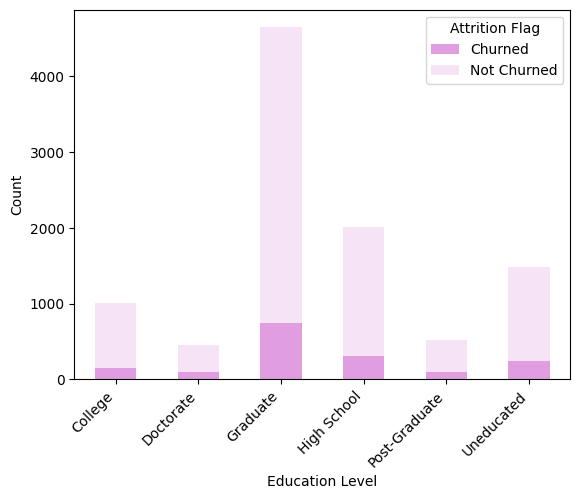

In [ ]:
custom_colors = ['#E09DE0', '#F6E3F6']
education_churn_counts = data.groupby(['Education_Level', 'Attrition_Flag']).size().unstack()
education_churn_counts.plot(kind='bar', stacked=True,color=custom_colors)
plt.ylabel("Count")
plt.xlabel("Education Level")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attrition Flag', labels=['Churned', 'Not Churned'])
plt.show()

#### Hypothesis 4 For the Marital Status (Chi-Square)

H0: There is no association between Marital Status and churn rate.

H1: There is an association between Marital Status and churn rate.

In [ ]:
crosstab = pd.crosstab(data['Attrition_Flag'], data['Marital_Status'])
chi2, p_value, dof, expected = chi2_contingency(crosstab)
print(f"Chi-Square: {chi2}, p-value: {p_value}")

Chi-Square: 3.9521150185828895, p-value: 0.1386146484288065


<span style="color:purple"> ==> With a p-value of 0.138 ,we fail to reject the null hypothesis and conclude that there is no statistically significant association between marital status and churn rate.</span>

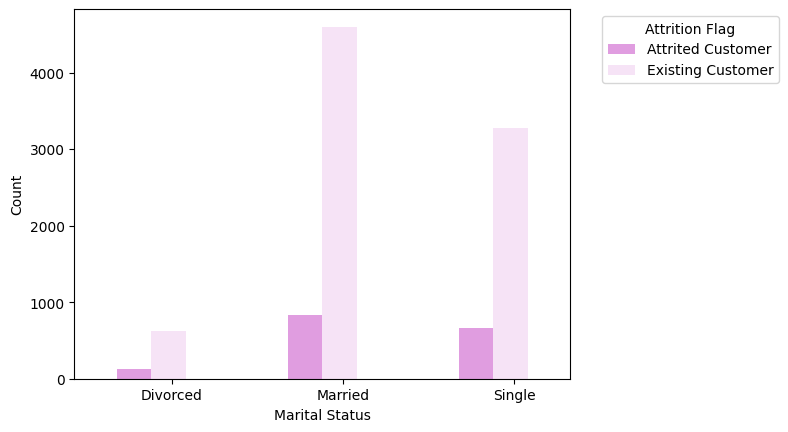

In [ ]:
custom_colors = ['#E09DE0', '#F6E3F6']
marital_churn_counts = data.groupby(['Marital_Status', 'Attrition_Flag']).size().unstack()
marital_churn_counts.plot(kind='bar', rot=0, position=0.8, width=0.4,color=custom_colors)
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title='Attrition Flag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Hypothesis 5 For the Income Category (Chi-Square)

H0: There is no association between Income Category and churn rate.

H1: There is an association between Income Category and churn rate.

In [ ]:
crosstab = pd.crosstab(data['Attrition_Flag'], data['Income_Category'])
chi2, p_value, dof, expected = chi2_contingency(crosstab)
print(f"Chi-Square: {chi2}, p-value: {p_value}")

Chi-Square: 12.746400093056144, p-value: 0.012583759366628224


<span style="color:purple"> The p-value of 0.0125 indicates a statistically significant association between income category and churn rate, so we reject the null hypothesis.</span>

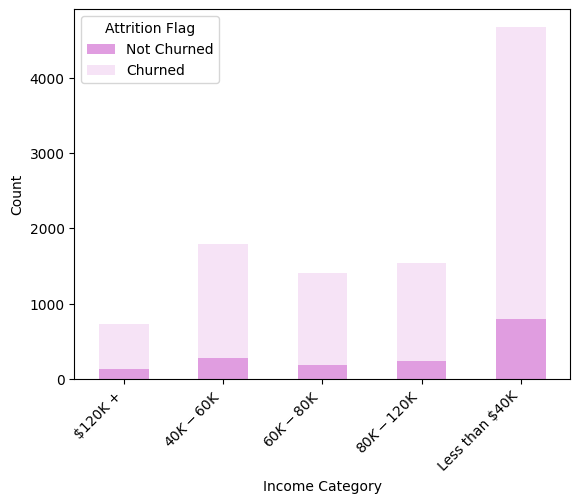

In [ ]:
income_churn_counts = data.groupby(['Income_Category', 'Attrition_Flag']).size().unstack()
income_churn_counts.plot(kind='bar', stacked=True,color=custom_colors)
plt.ylabel("Count")
plt.xlabel("Income Category")
plt.xticks(rotation=45, ha='right')  # Adjust rotation as needed for readability
plt.legend(title='Attrition Flag', labels=['Not Churned', 'Churned'])
plt.show()

#### Hypothesis 6 For the credit limit (t-test)


H0 : There is no difference in the average credit limit between churned and non-churned customers.

H1 : There is a difference in the average credit limit between churned and non-churned customers.

In [ ]:
churned = data[data['Attrition_Flag'] == 'Attrited Customer']['Credit_Limit'].to_numpy()
not_churned = data[data['Attrition_Flag'] == 'Existing Customer']['Credit_Limit'].to_numpy()
t_statistic, p_value = ttest_ind(churned, not_churned)
print(f"t-statistic: {t_statistic}, p-value: {p_value}")

t-statistic: -2.4028585836343748, p-value: 0.016285357205394337


<span style="color:purple"> With a p-value of 0.0163, we reject the null hypothesis and conclude that there is a statistically significant difference in average credit limit between churned and non-churned customers.</span>

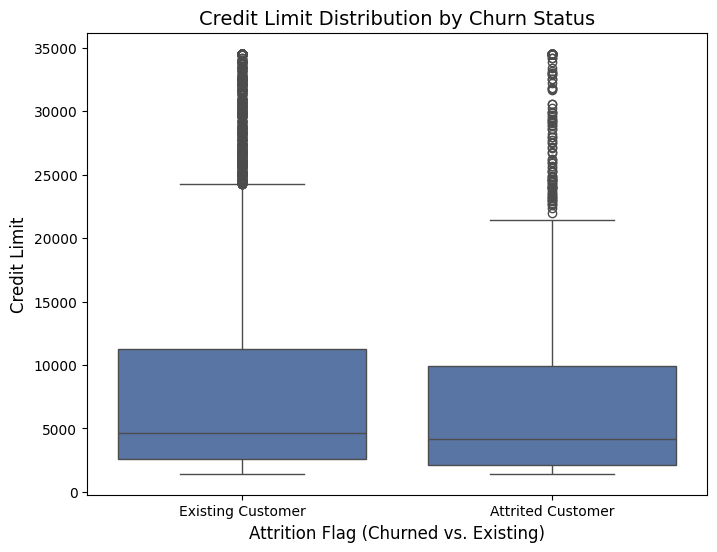

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=data)
plt.xlabel("Attrition Flag (Churned vs. Existing)", fontsize=12)
plt.ylabel("Credit Limit", fontsize=12)
plt.title("Credit Limit Distribution by Churn Status", fontsize=14)
plt.show()

#### Hypothesis 7 For the Average Balanec (t-test)


H0: There is no difference in average balance between churned and non-churned customers.

H1: There is a difference in average balance between churned and non-churned customers.

In [ ]:
churned = data[data['Attrition_Flag'] == 'Attrited Customer']['Avg_Open_To_Buy'].to_numpy()
not_churned = data[data['Attrition_Flag'] == 'Existing Customer']['Avg_Open_To_Buy'].to_numpy()
t_statistic, p_value = ttest_ind(churned, not_churned)
print(f"t-statistic: {t_statistic}, p-value: {p_value}")

t-statistic: -0.028685370654132375, p-value: 0.9771160894458855


<span style="color:purple">  The p-value of 0.9771 indicates no statistically significant difference in average open-to-buy balances between churned and non-churned customers, so we fail to reject the null hypothesis.</span>

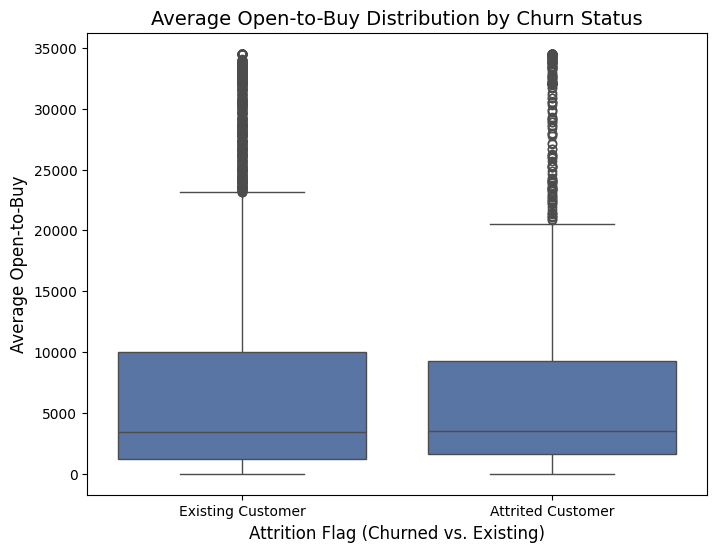

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition_Flag', y='Avg_Open_To_Buy', data=data)
plt.xlabel("Attrition Flag (Churned vs. Existing)", fontsize=12)
plt.ylabel("Average Open-to-Buy", fontsize=12)
plt.title("Average Open-to-Buy Distribution by Churn Status", fontsize=14)
plt.show()

## <span style="color:green"> Multivariate Analysis </span>

### <span style="color:orange"> Correlation Matrix </span>

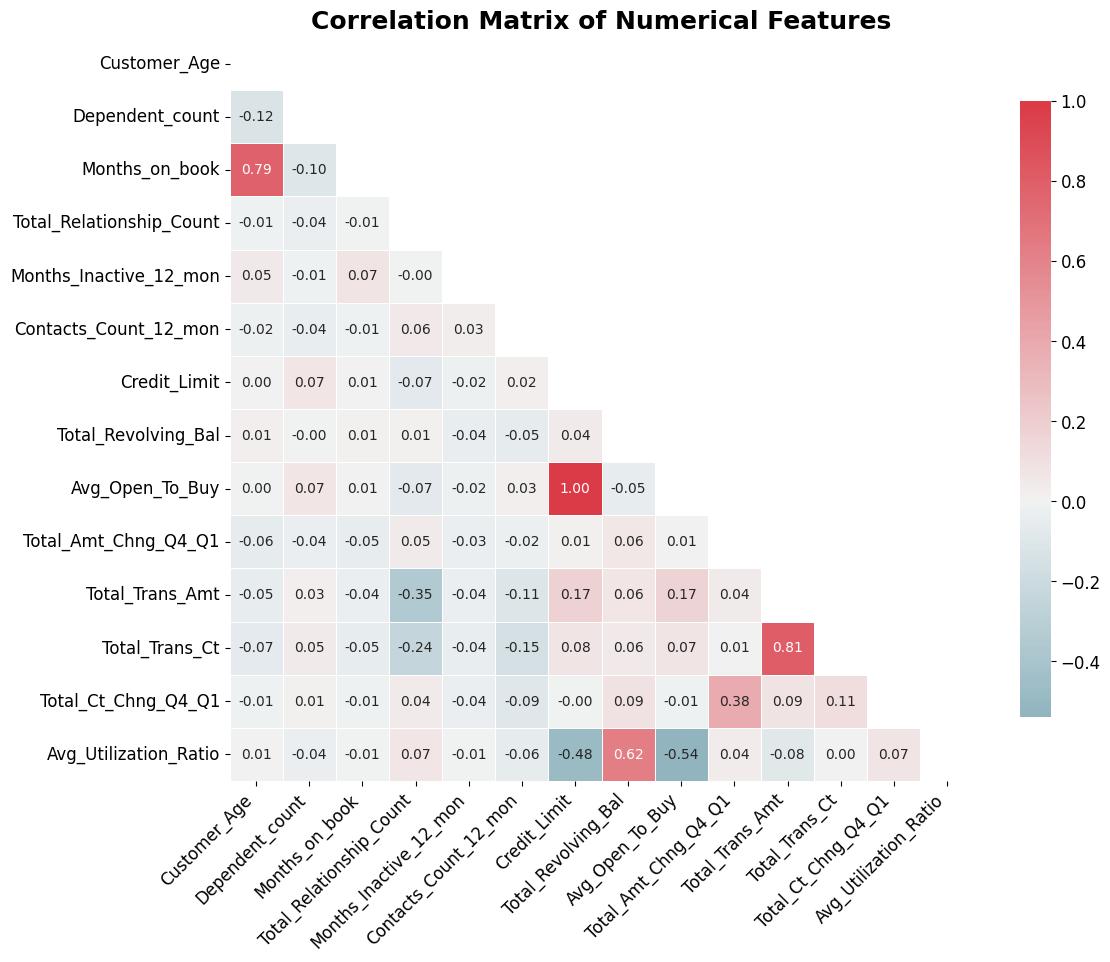

In [ ]:
correlation_matrix = data[num_columns].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, annot=True, annot_kws={"size": 10}, fmt='.2f')
plt.title("Correlation Matrix of Numerical Features", fontsize=18, fontweight='bold')
plt.xlabel("")
plt.ylabel("")
ax.tick_params(axis='both', labelsize=12)
plt.xticks(rotation=45, ha='right')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
plt.show()

<span style="color:purple"> ==>The correlation matrix reveals several noteworthy relationships among the numerical features, with notable positive correlations between "Months_on_book" and "Total_Relationship_Count," as well as "Credit_Limit" and "Avg_Open_To_Buy," while "Total_Trans_Amt" and "Total_Trans_Ct" exhibit the strongest positive correlation.  </span>

<span style="color:purple"> While the correlation matrix provides a good overview of pairwise correlations, pair plots offer a more detailed view of the relationships and potential non-linear patterns </span>

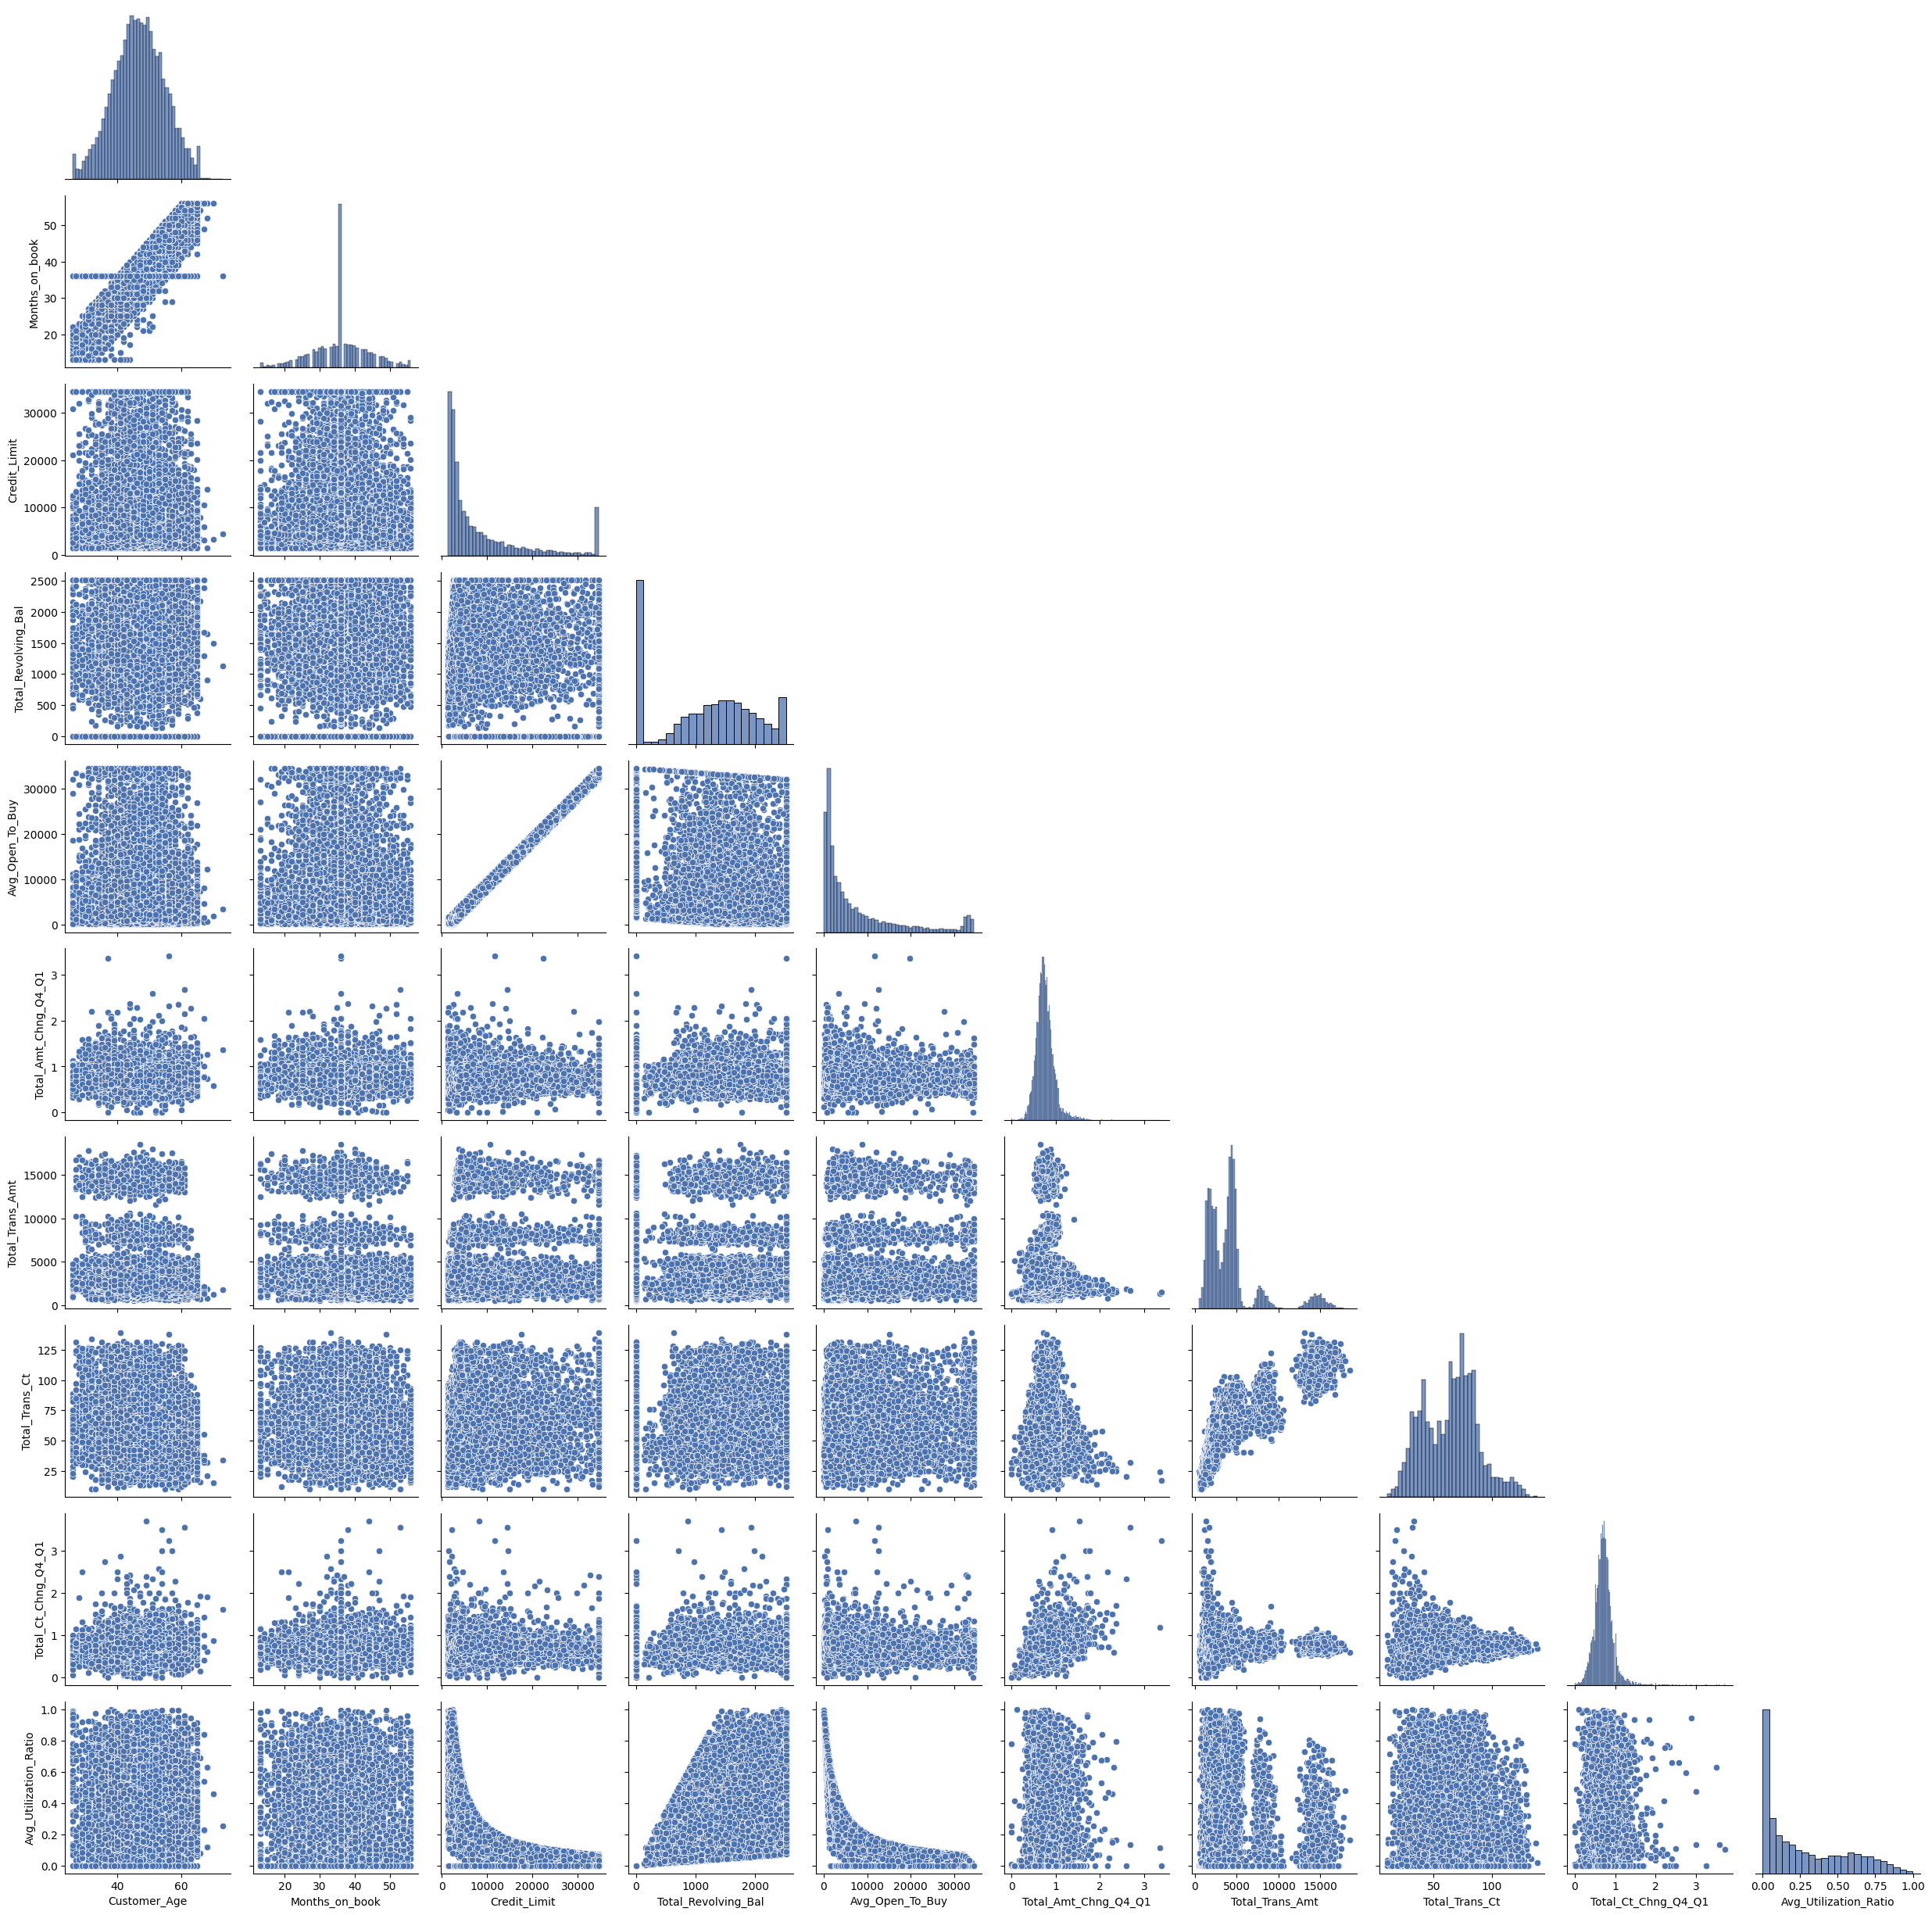

In [ ]:
g = sns.PairGrid(data[continuous_cols], diag_sharey=False,corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)

<span style="color:purple"> As we can see there is a linear relation between Credit Limit and Avg_Open_To_Buy that reveals the strong correlation between them  </span>


## <span style="color:green"> Outlier Analysis </span>

<span style="color:purple"> We performed outlier analysis on continuous features using the interquartile range (IQR) method to identify and visualize potential outliers. Box plots were generated for each feature, and the number of identified outliers was reported. </span>

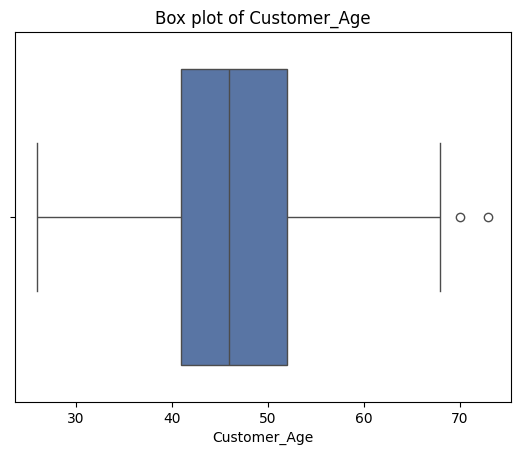

Number of outliers in Customer_Age: 2


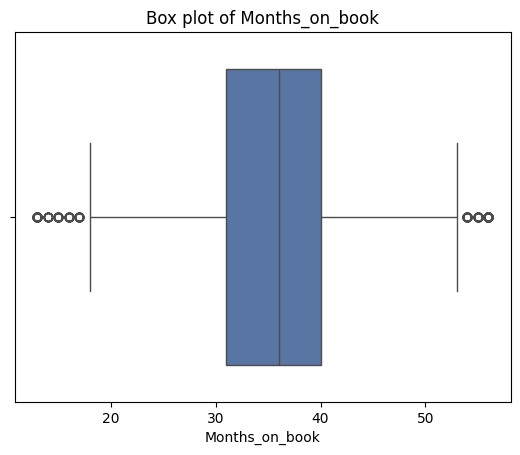

Number of outliers in Months_on_book: 386


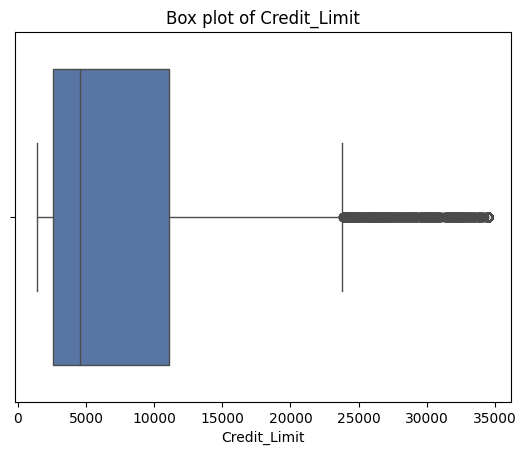

Number of outliers in Credit_Limit: 984


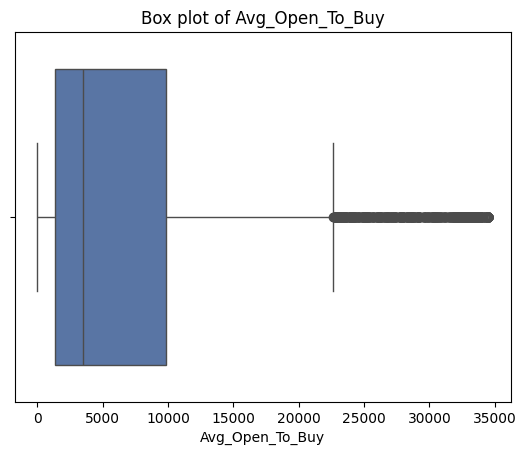

Number of outliers in Avg_Open_To_Buy: 963


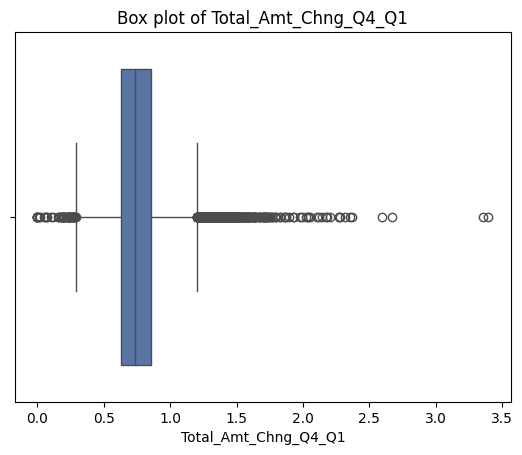

Number of outliers in Total_Amt_Chng_Q4_Q1: 396


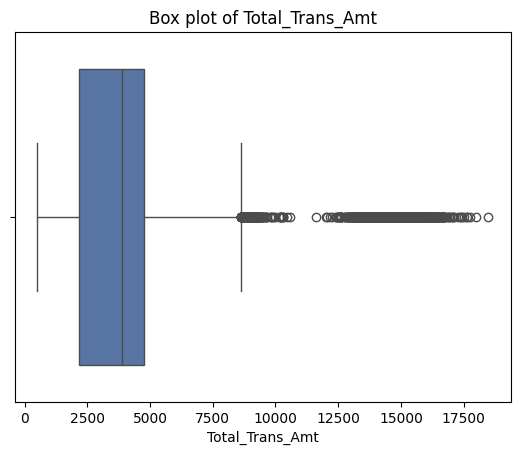

Number of outliers in Total_Trans_Amt: 896


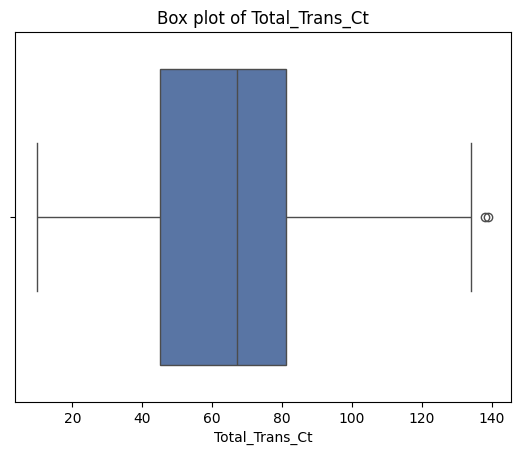

Number of outliers in Total_Trans_Ct: 2


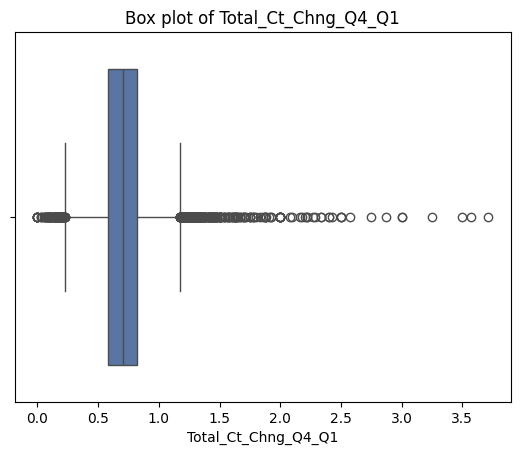

Number of outliers in Total_Ct_Chng_Q4_Q1: 394


In [ ]:
def outlier_threshhold(dataframe,column,q1=0.25,q3=0.75):
    Q1=dataframe[column].quantile(q1)
    Q3=dataframe[column].quantile(q3)
    iqr=Q3-Q1
    up_limit=Q3+1.5*iqr
    low_limit=Q1-1.5*iqr
    return low_limit,up_limit
def identify_outliers(dataframe, column, low_limit, up_limit):
    outliers = dataframe[(dataframe[column] < low_limit) | (dataframe[column] > up_limit)]
    return outliers
for column in continuous_cols:

    low_limit, up_limit = outlier_threshhold(data, column)
    outliers = identify_outliers(data, column, low_limit, up_limit)
    if len(outliers)>0:
    # Print box plot and outlier count
        plt.figure()
        sns.boxplot(x=data[column])

        plt.title(f"Box plot of {column}")
        plt.xlabel(column)
        plt.show()
        print(f"Number of outliers in {column}: {len(outliers)}")

# <span style="color:red">Data Preprocessing and Feature engineering </span>

## <span style="color:green"> Feature engineering </span>

In [ ]:
# Product of inactive months and contacts count
data['Inactive_Contacts_Interaction'] = data['Months_Inactive_12_mon'] * data['Contacts_Count_12_mon']
# Ratio of inactive months to months on book
data['inactive_months_ratio'] = data['Months_Inactive_12_mon'] / data['Months_on_book']
# Family size based on marital status and dependents
data['family_size'] = data['Marital_Status'].replace({'Married': 2, 'Single': 1, 'Divorced': 1, 'Unknown': 1}) + data['Dependent_count']
# Categorize tenure based on months on book
def tenure(months):
    if months <= 24:
        return 'New'
    elif 25 <= months <= 60:
        return 'Intermediate'
    else:
        return 'Long-term'

data['Tenure'] = data['Months_on_book'].apply(tenure)
# Calculate average amount extracted (annual credit limit minus annual average open to buy)
def avg_amount(credit, avg_open):
    return 12 * credit - 12 * avg_open

data['Avg_Amount_extracted'] = data.apply(lambda row: avg_amount(row['Credit_Limit'], row['Avg_Open_To_Buy']), axis=1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_35292\2636771569.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['family_size'] = data['Marital_Status'].replace({'Married': 2, 'Single': 1, 'Divorced': 1, 'Unknown': 1}) + data['Dependent_count']


In [ ]:
data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Married  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  ...  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
0                         5  ...                 1.335             1144   
1                         6  ...                 1.541             1291   
2                         4  ...                 2.594             1887   
3                         3  ...                 1.405             1171   
4                         5  ...                 2.175              816   

   Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0              42                1.625                  0.061   
1              33                3.714                  0.105   
2              20                2.333                  0.000   
3              20                2.333                  0.760   
4              28                2.500                  0.000   

   Inactive_Contacts_Interaction  inactive_months_ratio  family_size  \
0                              3               0.025641            5   
1                              2               0.022727            6   
2                              0               0.027778            5   
3                              4               0.117647            6   
4                              0               0.047619            5   

         Tenure  Avg_Amount_extracted  
0  Intermediate                9324.0  
1  Intermediate               10368.0  
2  Intermediate                   0.0  
3  Intermediate               30204.0  
4           New                   0.0  

[5 rows x 25 columns]

<span style="color:purple"> Now we are going to see the correlation between the new and the original features using the correlation matrix </span>


### <span style="color:orange"> Correlation matrix </span>

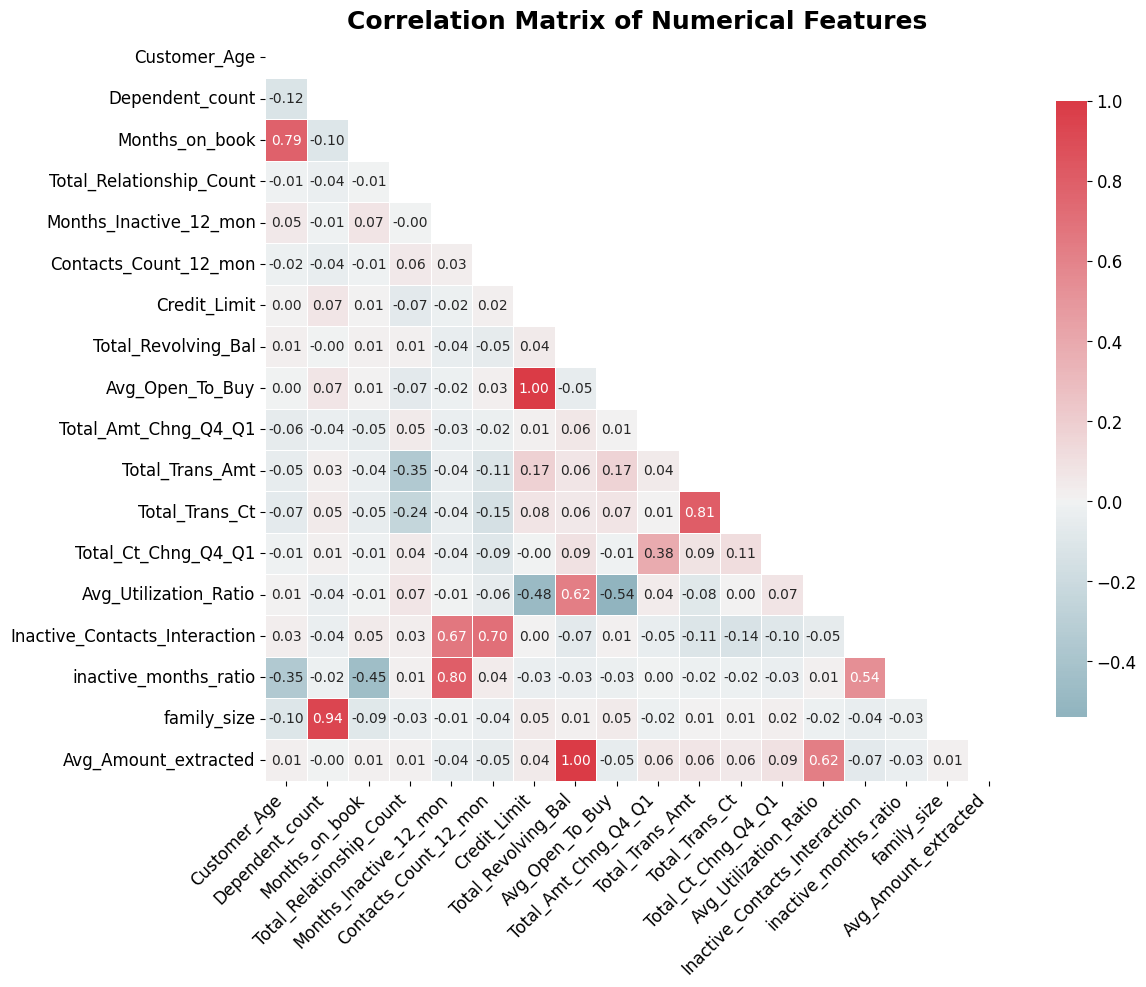

In [ ]:
#numerical features
cat_features = []
num_features = []
for col in data.columns:
    if data[col].dtype == "O":
        cat_features.append(col)
    else:
        num_features.append(col)
correlation_matrix = data[num_features].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, annot=True, annot_kws={"size": 10}, fmt='.2f')
plt.title("Correlation Matrix of Numerical Features", fontsize=18, fontweight='bold')
plt.xlabel("")
plt.ylabel("")
ax.tick_params(axis='both', labelsize=12)
plt.xticks(rotation=45, ha='right')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
plt.show()

## <span style="color:green"> Check duplicates</span>

In [ ]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 25)


## <span style="color:green">  Handle outliers </span>

<span style="color:purple"> To handle outliers in continuous features, we will replace values exceeding the defined thresholds with the respective threshold values </span>

In [ ]:
def replace_with_threshholds(dataframe,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    dataframe[column] = dataframe[column].astype(float)
    dataframe.loc[(dataframe[column]<low_limit),column]=low_limit
    dataframe.loc[(dataframe[column]>up_limit),column]=up_limit
    return dataframe
for column in continuous_cols:
    data=replace_with_threshholds(data,column)

In [ ]:
data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer          45.0      M                3     High School   
1  Existing Customer          49.0      F                5        Graduate   
2  Existing Customer          51.0      M                3        Graduate   
3  Existing Customer          40.0      F                4     High School   
4  Existing Customer          40.0      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue            39.0   
1         Single  Less than $40K          Blue            44.0   
2        Married    $80K - $120K          Blue            36.0   
3        Married  Less than $40K          Blue            34.0   
4        Married     $60K - $80K          Blue            21.0   

   Total_Relationship_Count  ...  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
0                         5  ...                 1.201           1144.0   
1                         6  ...                 1.201           1291.0   
2                         4  ...                 1.201           1887.0   
3                         3  ...                 1.201           1171.0   
4                         5  ...                 1.201            816.0   

   Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0            42.0                1.172                  0.061   
1            33.0                1.172                  0.105   
2            20.0                1.172                  0.000   
3            20.0                1.172                  0.760   
4            28.0                1.172                  0.000   

   Inactive_Contacts_Interaction  inactive_months_ratio  family_size  \
0                              3               0.025641            5   
1                              2               0.022727            6   
2                              0               0.027778            5   
3                              4               0.117647            6   
4                              0               0.047619            5   

         Tenure  Avg_Amount_extracted  
0  Intermediate                9324.0  
1  Intermediate               10368.0  
2  Intermediate                   0.0  
3  Intermediate               30204.0  
4           New                   0.0  

[5 rows x 25 columns]

## <span style="color:green"> Encoding </span>

<span style="color:purple"> We will one-hot encode categorical features such as 'Education_Level,' 'Marital_Status,' and 'Income_Category' to create numerical representations. Additionally, we will encode 'Gender' and 'Attrition_Flag' using numerical values 0 and 1.</span>

In [ ]:
def encode(data):

    categorical_cols = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category','Tenure']
    data_encoded = pd.get_dummies(data, columns=categorical_cols, prefix_sep='_', drop_first=True)
    boolean_cols = data_encoded.select_dtypes(include=bool).columns
    data_encoded[boolean_cols] = data_encoded[boolean_cols].astype(int)

    data_encoded['Attrition_Flag'] = data['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})
    data_encoded['Gender'] = data['Gender'].replace({'M': 0, 'F': 1})

    return data_encoded
data=encode(data)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_35292\1309266469.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded['Attrition_Flag'] = data['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_35292\1309266469.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded['Gender'] = data['Gender'].replace({'M': 0, 'F': 1})


In [ ]:
data.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Months_on_book  \
0               0          45.0       0                3            39.0   
1               0          49.0       1                5            44.0   
2               0          51.0       0                3            36.0   
3               0          40.0       1                4            34.0   
4               0          40.0       0                3            21.0   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  ...  Marital_Status_Married  \
0       12691.0                777.0  ...                       1   
1        8256.0                864.0  ...                       0   
2        3418.0                  0.0  ...                       1   
3        3313.0               2517.0  ...                       1   
4        4716.0                  0.0  ...                       1   

   Marital_Status_Single  Income_Category_$40K - $60K  \
0                      0                            0   
1                      1                            0   
2                      0                            0   
3                      0                            0   
4                      0                            0   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                            1                             0   
1                            0                             0   
2                            0                             1   
3                            0                             0   
4                            1                             0   

   Income_Category_Less than $40K  Card_Category_Gold  Card_Category_Platinum  \
0                               0                   0                       0   
1                               1                   0                       0   
2                               0                   0                       0   
3                               1                   0                       0   
4                               0                   0                       0   

   Card_Category_Silver  Tenure_New  
0                     0           0  
1                     0           0  
2                     0           0  
3                     0           0  
4                     0           1  

[5 rows x 35 columns]

## <span style="color:green"> Feature Scaling </span>

<span style="color:purple"> To ensure that features are on a similar scale and improve the performance of machine learning models, we will apply feature scaling." </span>

In [ ]:
def scale_features(data):
    # Columns for standardization
    standardization_cols = ['Customer_Age', 'Months_on_book']
    # Columns for normalization
    normalization_cols = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy']

    preprocessor = ColumnTransformer(
        transformers=[
            ('std', StandardScaler(), standardization_cols),
            ('norm', MinMaxScaler(), normalization_cols)
        ]
    )
    data_scaled = preprocessor.fit_transform(data)
    column_names = standardization_cols + normalization_cols  # Combine column names
    data_scaled_df = pd.DataFrame(data_scaled, columns=column_names, index=data.index)
    other_cols = list(set(data.columns) - set(column_names))
    data_scaled_df[other_cols] = data[other_cols]
    return data_scaled_df
data=scale_features(data)

## <span style="color:green"> Data Upsampling Using SMOTE Algorithm </span>


<span style="color:purple">To address the class imbalance present in our data, we will apply the Synthetic Minority Oversampling Technique (SMOTE) to generate synthetic samples for the minority class.</span>


In [ ]:
# Split target & features
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']

In [ ]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_smote.shape}''')
print('\nBalance of positive and negative classes (%):')
y_smote.value_counts(normalize=True) * 100

Shape of X before SMOTE: (10127, 34)
Shape of X after SMOTE: (17000, 34)

Balance of positive and negative classes (%):


Attrition_Flag
0    50.0
1    50.0
Name: proportion, dtype: float64

In [ ]:
X_smote

Customer_Age  Months_on_book  Total_Trans_Amt  Total_Trans_Ct  \
0         -0.165368        0.392971         0.078182        0.256000   
1          0.333718        1.036214         0.096310        0.184000   
2          0.583262        0.007025         0.169806        0.080000   
3         -0.789227       -0.250272         0.081512        0.080000   
4         -0.789227       -1.922704         0.037735        0.144000   
...             ...             ...              ...             ...   
16995      0.325330        0.603781         0.149312        0.165445   
16996     -1.683787       -1.724839         0.125900        0.196795   
16997      0.208736        0.221186         0.149055        0.181351   
16998     -0.294874        0.378329         0.301324        0.349875   
16999      1.133774        1.255698         0.789833        0.383311   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0          0.502399             0.308701         0.525692   
1          0.304389             0.343266         0.326114   
2          0.088388             0.000000         0.150721   
3          0.083700             1.000000         0.034999   
4          0.146339             0.000000         0.208008   
...             ...                  ...              ...   
16995      0.950602             0.000000         0.971223   
16996      0.307148             0.000000         0.366973   
16997      0.185732             0.000000         0.246950   
16998      0.396444             1.000000         0.344157   
16999      0.452586             0.302777         0.474355   

       Income_Category_$40K - $60K  Tenure_New  Income_Category_$80K - $120K  \
0                                0           0                             0   
1                                0           0                             0   
2                                0           0                             1   
3                                0           0                             0   
4                                0           1                             0   
...                            ...         ...                           ...   
16995                            0           0                             0   
16996                            0           0                             0   
16997                            0           0                             0   
16998                            0           0                             0   
16999                            0           0                             0   

       ...  Card_Category_Gold  Inactive_Contacts_Interaction  \
0      ...                   0                              3   
1      ...                   0                              2   
2      ...                   0                              0   
3      ...                   0                              4   
4      ...                   0                              0   
...    ...                 ...                            ...   
16995  ...                   0                             12   
16996  ...                   0                              9   
16997  ...                   0                              4   
16998  ...                   0                              9   
16999  ...                   0                              8   

       Education_Level_Doctorate  Total_Ct_Chng_Q4_Q1  Dependent_count  \
0                              0             1.172000                3   
1                              0             1.172000                5   
2                              0             1.172000                3   
3                              0             1.172000                4   
4                              0             1.172000                3   
...                          ...                  ...              ...   
16995                          0             0.318176                3   
16996                          0             0.384421                1   
1

# <span style="color:red"> Dimensionality Reduction</span>

<span style="color:purple"> Next, using the Principal Component Analysis (PCA), we will reduce the dimensionality of the dataset as "small" as possible without losing any information.</span>


<span style="color:purple"> We plot explained variance ratio and choose a number of components that "capture" at least 95% of the variance of the original dataset</span>

<span style="color:purple"> we are goint to do pca for numerical features and we are going to save the categorical features  </span>


In [ ]:
smote_num=['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio','inactive_months_ratio', 'family_size']

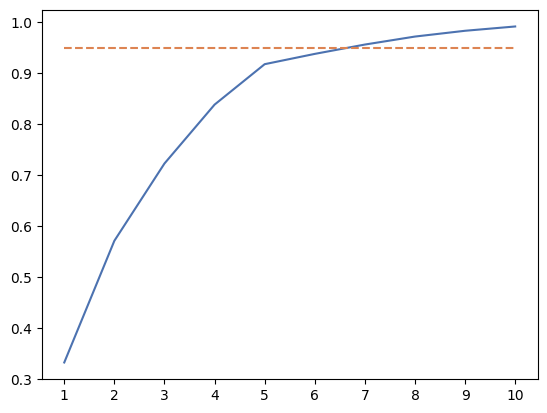

In [ ]:
from sklearn.decomposition import PCA
pca10 = PCA(n_components=10)
pca10.fit(X_smote[smote_num])
x_pca_num = pca10.transform(X_smote[smote_num])

l2 = []
for i in np.arange(1, 11, 1):
    l2.append(0.95)

plt.plot(np.arange(1, 11, 1), np.cumsum(pca10.explained_variance_ratio_))
plt.plot(np.arange(1, 11, 1), l2, ls='--')
plt.xticks(np.arange(1, 11, 1))
plt.show()

<span style="color:purple"> Based on the above graph, we select n_components = 7 to conudct our PCA</span>

In [ ]:
pca7 = PCA(n_components=7)
pca7.fit(X_smote[smote_num])
x_pca_num = pca7.transform(X_smote[smote_num])
x_pca = pd.DataFrame(x_pca_num, columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7'])

In [ ]:
smote_cat=[]
for index in X_smote.columns:
    if index not in smote_num:
        smote_cat.append(index)

<span style="color:purple"> We are going to concat the new features with the categorical features saved </span>


In [ ]:
x_pca = pd.concat([x_pca, X_smote[smote_cat]], axis=1)

In [ ]:
x_pca

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0      1.367966  1.565802 -0.188673  0.083236 -1.459040  0.347403 -0.405054   
1      3.316666  2.460298 -1.420745 -0.822960 -1.375239  0.209525 -0.529247   
2      1.405577  0.516143 -0.478532 -2.794111 -0.747817  0.062529  0.437962   
3      2.905679 -0.489158 -0.087256 -1.018502  1.991420 -0.748048 -0.365792   
4      1.787360  1.694353  1.676720 -2.753088 -0.241825  0.146306  0.845421   
...         ...       ...       ...       ...       ...       ...       ...   
16995  0.492838 -0.569021 -0.736857  1.598638  0.007765  0.955818 -0.140302   
16996 -1.770314 -0.283576  2.624953  0.590594  1.007498  0.303185  0.092362   
16997 -0.055732 -0.434641  0.076145  0.065078 -1.504512  0.074949  0.015298   
16998  2.010730  0.484077 -0.509344  0.612191  0.397710 -0.075404 -0.527505   
16999 -1.009508  0.353361 -1.658555 -0.447484  0.389036  0.415396 -0.095302   

       Income_Category_$40K - $60K  Tenure_New  Income_Category_$80K - $120K  \
0                                0           0                             0   
1                                0           0                             0   
2                                0           0                             1   
3                                0           0                             0   
4                                0           1                             0   
...                            ...         ...                           ...   
16995                            0           0                             0   
16996                            0           0                             0   
16997                            0           0                             0   
16998                            0           0                             0   
16999                            0           0                             0   

       ...  Marital_Status_Married  Education_Level_Uneducated  \
0      ...                       1                           0   
1      ...                       0                           0   
2      ...                       1                           0   
3      ...                       1                           0   
4      ...                       1                           1   
...    ...                     ...                         ...   
16995  ...                       0                           1   
16996  ...                       0                           0   
16997  ...                       1                           0   
16998  ...                       0                           0   
16999  ...                       0                           0   

       Card_Category_Silver  Education_Level_Post-Graduate  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   
...                     ...                            ...   
16995                     0                              0   
16996                     0                              0   
16997                     0                              0   
16998                     0                              0   
16999                     0                              0   

       Card_Category_Gold  Inactive_Contacts_Interaction  \
0                       0                              3   
1                       0                              2   
2                       0                              0   
3                       0                              4   
4                       0                              0   
...                   ...                            ...   
16995                   0                             12   
16996                   0                              9   
16997                  

# <span style="color:red"> Modeling </span>

## <span style="color:green"> Splitting Data </span>

<span style="color:purple"> The oversampled data is then partitioned into an 80% training set and a 20% testing set to assess model performance."</span>


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

<span style="color:purple"> Now we are going to use 2 tree based ensemble models : Random Forest and Gradient boost

1: we are going to use 4 metrics : Accuracy score, F1 Score, Precision Score, ROC-AUC Score

2 see the confusion matrix
    
3: Features impotrtances
    
4: plot the roc curve
</span>


## <span style="color:green"> Random Forest </span>

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

GV_RFC = GridSearchCV(RandomForestClassifier(random_state=42),
                      param_grid=param_grid,
                      scoring='f1',
                      cv=3,
                      verbose=0,
                      n_jobs=-1)

GV_RFC.fit(X_train, y_train)

print("Best score: ", GV_RFC.best_score_)
print("Best params: ", GV_RFC.best_params_)

Best score:  0.9692131644512433
Best params:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
best_params = GV_RFC.best_params_
RFC = RandomForestClassifier(random_state=42, **best_params)

RFC = RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))
print('Precision Score: ', round(precision_score(y_test, y_pred), 4))
print('ROC-AUC Score: ', round(roc_auc_score(y_test, y_pred), 4))

Accuracy score:  0.975
F1 Score:  0.9754
Precision Score:  0.9723
ROC-AUC Score:  0.9749


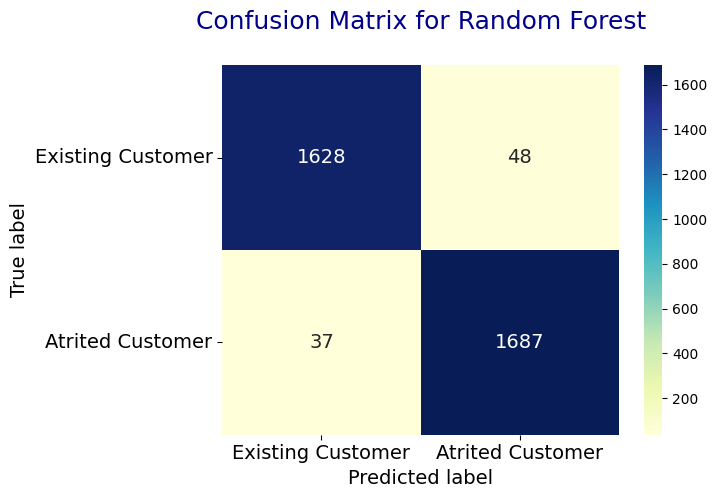

In [ ]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred)),
                                   ('Existing Customer', 'Atrited Customer'),
                                   ('Existing Customer', 'Atrited Customer'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {'size' : 14}, fmt = 'd', cmap = 'YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'center', fontsize = 14)

plt.title('Confusion Matrix for Random Forest\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label',fontsize = 14)
plt.show()

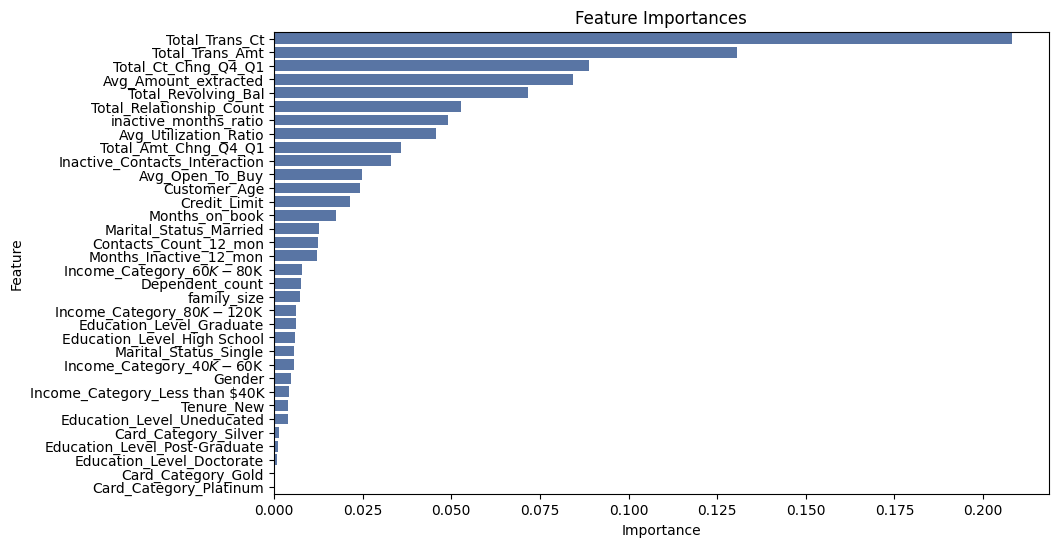

In [ ]:
importances = RFC.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

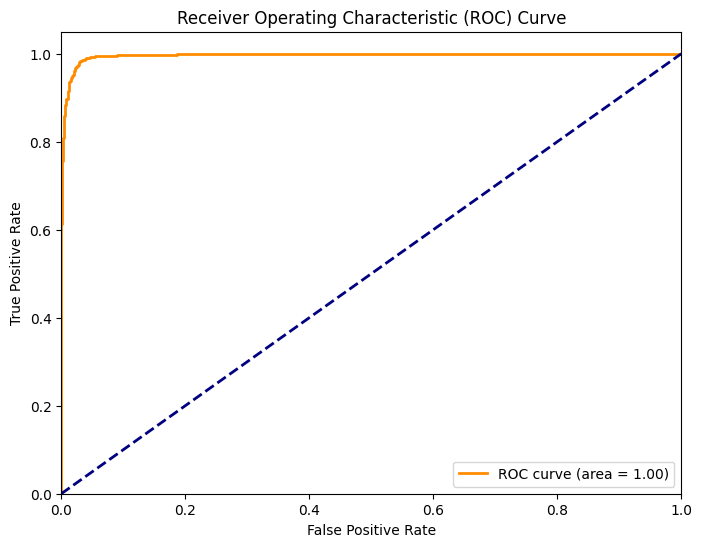

In [ ]:
y_pred_proba = RFC.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## <span style="color:green"> Gradient Boosting Classifier </span>

In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.125, 0.5],
    'n_estimators':[300, 400, 500],
    'max_depth':[7, 9, 11]
     }
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42),
                      param_grid=param_grid,
                      scoring='f1',
                      cv = 3,
                      verbose=0,
                      n_jobs=-1)
GV_GBC = GV_GBC.fit(X_train, y_train)
print("best score: ", GV_GBC.best_score_)
print("best param: ", GV_GBC.best_params_)

best score:  0.9807307808971434
best param:  {'learning_rate': 0.125, 'max_depth': 7, 'n_estimators': 500}


In [ ]:
best_params = GV_GBC.best_params_
GB = GradientBoostingClassifier(random_state=42, **best_params)

GB = GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)

print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 4))
print('F1 Score: ', round(f1_score(y_test, y_pred), 4))
print('Precision Score: ', round(precision_score(y_test, y_pred), 4))
print('ROC-AUC Score: ', round(roc_auc_score(y_test, y_pred), 4))

Accuracy score:  0.9832
F1 Score:  0.9835
Precision Score:  0.981
ROC-AUC Score:  0.9832


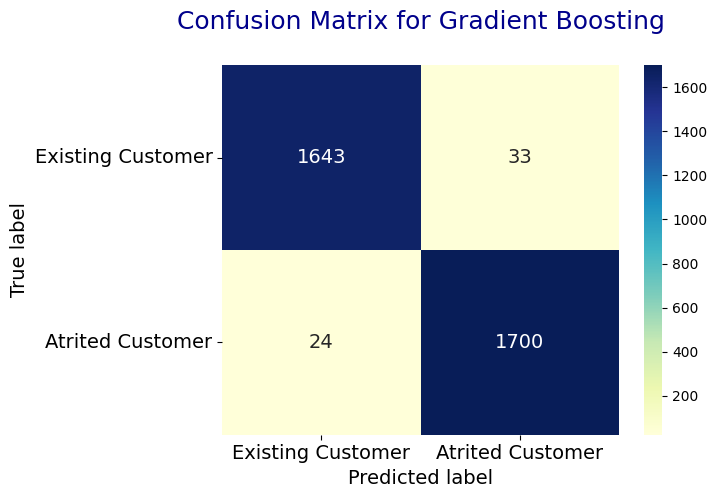

In [ ]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred)),
                                   ('Existing Customer', 'Atrited Customer'),
                                   ('Existing Customer', 'Atrited Customer'))
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {'size' : 14}, fmt = 'd', cmap = 'YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'center', fontsize = 14)

plt.title('Confusion Matrix for Gradient Boosting\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label',fontsize = 14)
plt.show()

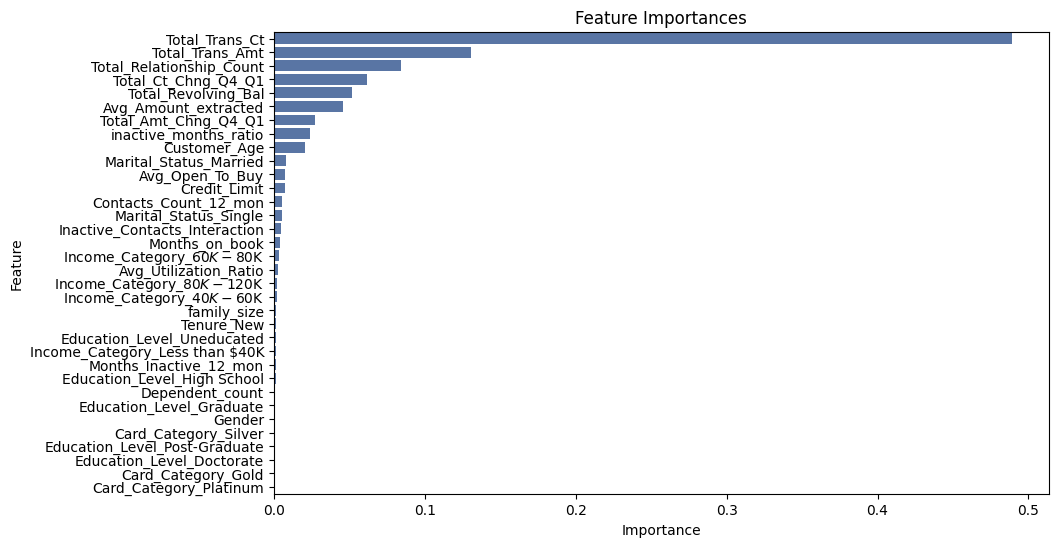

In [ ]:
importances = GB.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# <span style="color:red">Model Selection </span>

### We are going to use the Gradient Boosting model

# <span style="color:red"> Conclusion </span>

### 1: It is crucial to deal with imbalanced data. SMOTE is an excellent algorithm for that purpose.
### 2: PCA doesn't improve the results so we are not going to use it